MY FIRST NOTEBOOK

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [84]:
df = pd.read_csv('data.csv')
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [85]:
X = df['km']
y = df['price']

Text(0, 0.5, 'Price')

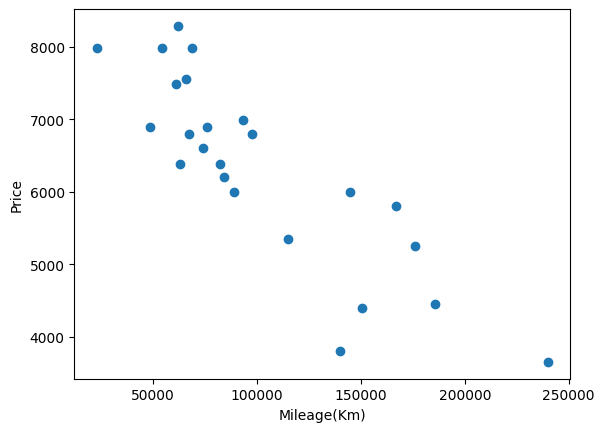

In [86]:
plt.scatter(X, y)
plt.xlabel('Mileage(Km)')
plt.ylabel('Price')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((19,), (5,))

In [88]:
# Scikit-learn expects a 2D array for the features so reshape X_train and X_test from 1D to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
X_train.shape, X_test.shape

((19, 1), (5, 1))

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Finding c amd m coefficients (of the best fit line) in the linear regression model
y = mx + c

In [90]:
#finding y-intercept 
c = model.intercept_
c

8698.637818318195

In [91]:
m = model.intercept_
m

8698.637818318195

In [92]:
#printing the predicted value and the actual value side by side
for i in range(0, len(X_test)):
    print((model.coef_ * X_test[i] + model.intercept_),y_test.values[i])

[5291.10910628] 5999
[4323.55960417] 4450
[7211.58757208] 6390
[7118.67640858] 6800
[4548.29142857] 5250


In [93]:
# instead of using the y = mx + c formula, we can use the predict method
y_pred = model.predict(X_test)
y_pred

array([5291.10910628, 4323.55960417, 7211.58757208, 7118.67640858,
       4548.29142857])

Text(0, 0.5, 'Price')

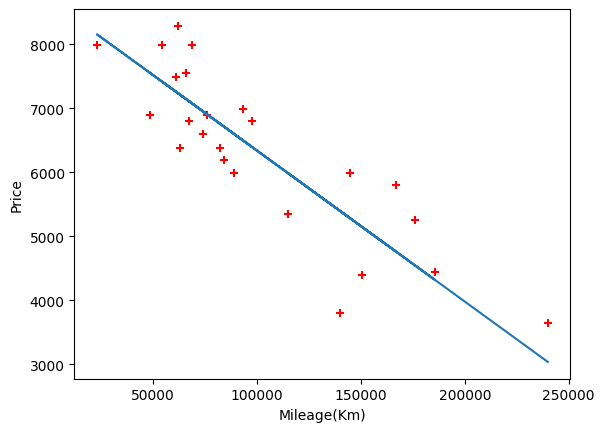

In [94]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array(df['km'])
y = np.array(df['price'])
plt.scatter(X,y,color='red',marker='+')
plt.plot(X,model.predict(X.reshape(-1,1)))
plt.xlabel('Mileage(Km)')
plt.ylabel('Price')

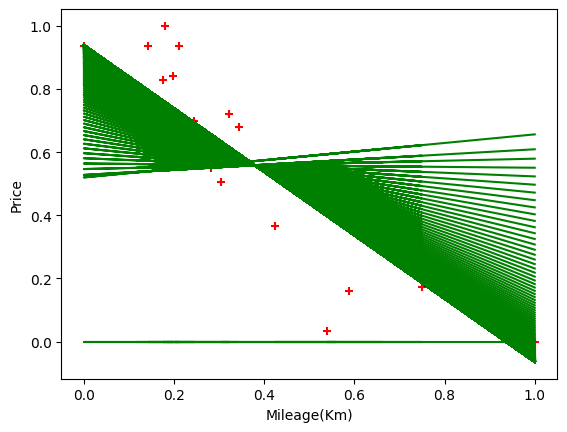

In [99]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(df['km'])
y = np.array(df['price'])
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())
plt.scatter(X,y,color='red',marker='+')
plt.xlabel('Mileage(Km)')
plt.ylabel('Price')
%matplotlib inline

def estimate_price(mileage, theta0, theta1):
    return theta0 + (theta1 * mileage)

def gradient_descent(x,y):
    theta0 = 0  #y intercept
    theta1 = 0 #slope
    num_iters = 1000
    m = len(y)
    learning_rate = 0.9
    prev_loss = float('inf')
    for i in range(num_iters):
        y_pred = estimate_price(x, theta0, theta1)
        #Mean Squared Error
        loss = (1/m) * sum([val**2 for val in (y - y_pred)])
        plt.plot(x,y_pred,color='green')
        #Derivative of the loss function wrt theta0 and theta
        tmp_theta0 = learning_rate * 1/m * sum(y_pred - y)
        tmp_theta1 = learning_rate * 1/m * sum((y_pred - y) * x)
        theta0 = theta0 - tmp_theta0
        theta1 = theta1 - tmp_theta1
        # print("theta0: {}, theta1: {}, loss: {}".format(theta0, theta1, loss))

gradient_descent(X,y)
        
        
        
        
        
        
 

[1.         0.53846366 0.58774948 0.74910295 0.70520633 0.42330989
 0.66282974 0.30447119 0.56011257 0.28144044 0.27236171 0.18498763
 0.23537893 0.34362347 0.20313587 0.24470638 0.11670144 0.3228958
 0.17526405 0.19702811 0.1432559  0.21004509 0.         0.17913321] [0.         0.03232759 0.16163793 0.17241379 0.34482759 0.36637931
 0.46336207 0.50431034 0.50625    0.54956897 0.59051724 0.59051724
 0.63577586 0.67887931 0.67887931 0.70043103 0.70043103 0.71982759
 0.82758621 0.84159483 0.93534483 0.93534483 0.93534483 1.        ]
theta0: 0.9393189294427164, theta1: -1.0035757423784608, loss: 0.02069918833007921


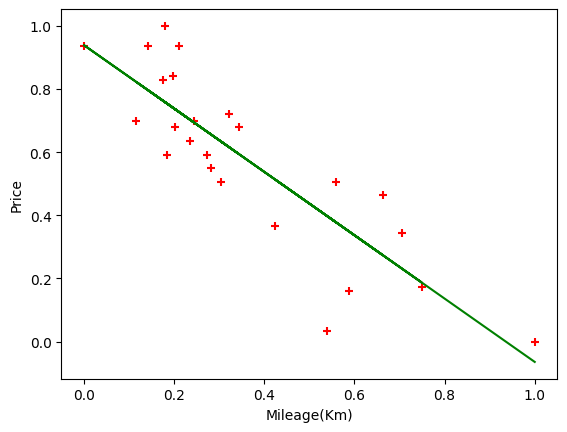

In [97]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(df['km'])
y = np.array(df['price'])
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())
print(X,y)
plt.scatter(X,y,color='red',marker='+')
plt.xlabel('Mileage(Km)')
plt.ylabel('Price')
%matplotlib inline

def estimate_price(mileage, theta0, theta1):
    return theta0 + (theta1 * mileage)

def gradient_descent(x,y):
    theta0 = 0  #y intercept
    theta1 = 0 #slope
    num_iters = 5000
    m = len(y)
    learning_rate = 0.9
    prev_loss = float('inf')
    for i in range(num_iters):
        y_pred = estimate_price(x, theta0, theta1)
        #Mean Squared Error
        loss = (1/m) * sum([val**2 for val in (y - y_pred)])
        # plt.plot(x,y_pred,color='green')
        #Derivative of the loss function wrt theta0 and theta
        tmp_theta0 = learning_rate * 1/m * sum(y_pred - y)
        tmp_theta1 = learning_rate * 1/m * sum((y_pred - y) * x)
        theta0 = theta0 - tmp_theta0
        theta1 = theta1 - tmp_theta1
        # print("theta0: {}, theta1: {}, loss: {}".format(theta0, theta1, loss))
    print("theta0: {}, theta1: {}, loss: {}".format(theta0, theta1, loss))
    #plot the final line
    y_pred = estimate_price(x, theta0, theta1)
    plt.plot(x,y_pred,color='green')
    
    
gradient_descent(X,y)